# importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection  import train_test_split

# 1. reading the datasets

In [2]:
df = pd.read_csv('FuelConsumptionDataset.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# 2. EDA


#  2.1 describing the dataset

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000



# 2.2 histogram : data distribution

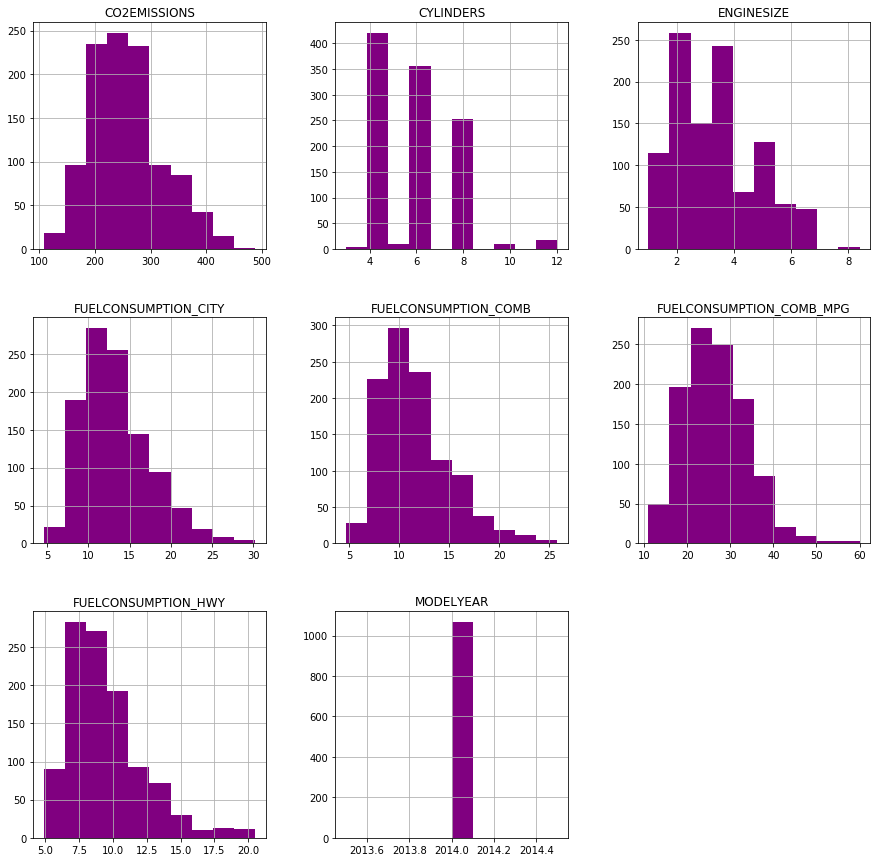

In [4]:
df.hist(figsize = (15,15),color=['purple'])
plt.show()

# 2.3 pairplot

/home/dsc1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dsc1/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/dsc1/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/dsc1/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


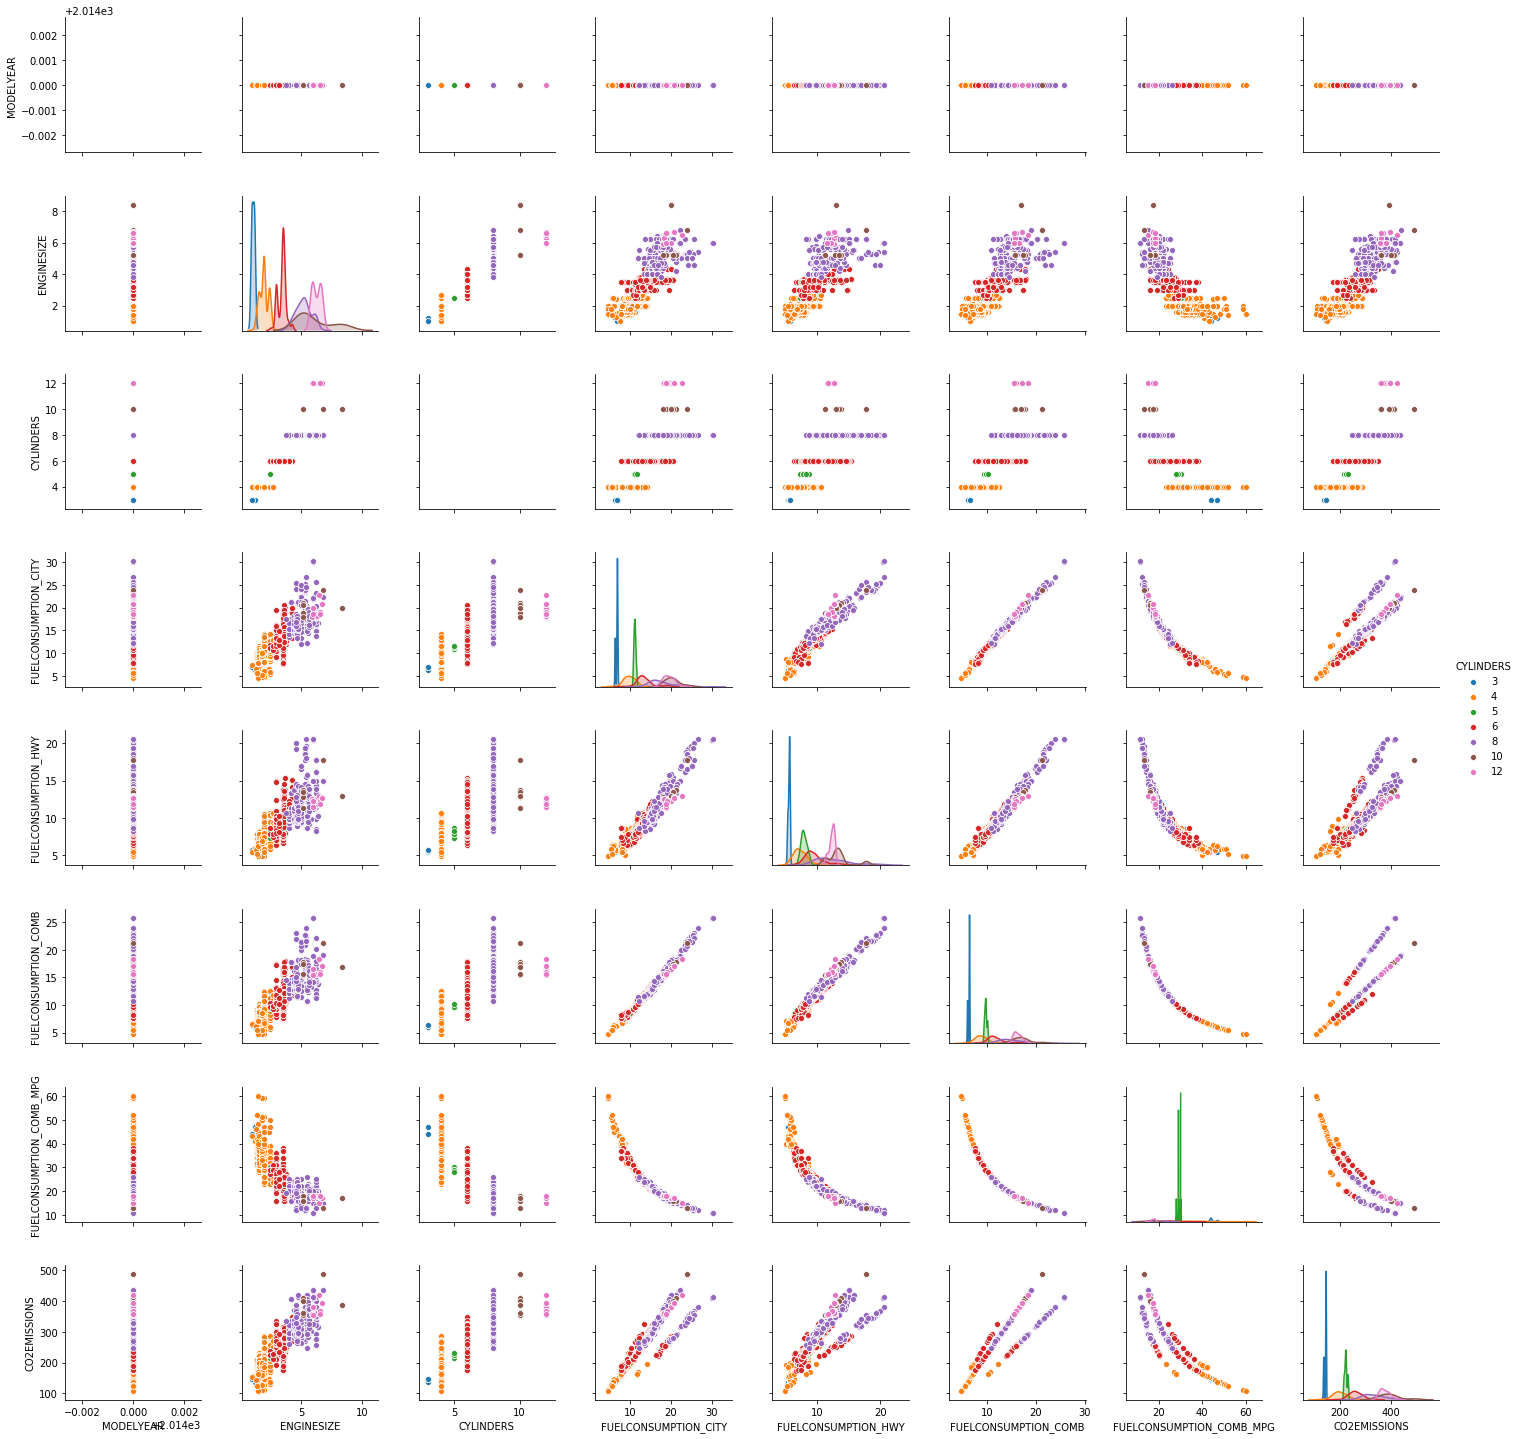

In [5]:
sns.pairplot(data = df,hue='CYLINDERS')
plt.show()

# 2.4 correlation matrix

In [6]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


# 2.5 heatmap

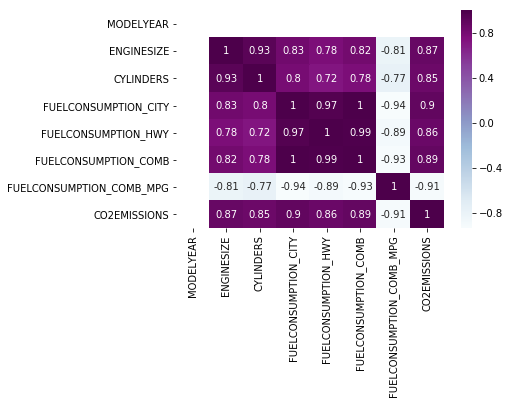

In [7]:
sns.heatmap(df.corr(),annot = True,cmap = 'BuPu')
plt.show()

# 3. preprocessing

# 3.1 Checking null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


# 3.2 deleting duplicate records/rows

In [9]:
df.duplicated().any()

False

# 3.3 (a) feature scaling

In [10]:
d = df.iloc[:,[4,5,8,9,10,11,12]]

In [11]:
normalized = (d - d.min())/(d.max()-d.min())
normalized.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.135135,0.111111,0.207031,0.115385,0.180095,0.448980,0.231579
1,0.189189,0.111111,0.257812,0.179487,0.232227,0.367347,0.297368
2,0.067568,0.111111,0.054688,0.057692,0.056872,0.755102,0.073684
3,0.337838,0.333333,0.316406,0.269231,0.303318,0.285714,0.386842
4,0.337838,0.333333,0.292969,0.243590,0.279621,0.326531,0.357895


# 3.3 (b) z-score indexing

In [12]:
# we want we perform feature scaling as we don't want a set of features ( features taking larger scale of values ) 
# to dominate the prediction / estimation as compared to  other set of features ( features taking lower scale of values ).
# (x - xmean)/std

In [13]:
zscore = (d - d.mean())/d.std()
zscore.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,-0.950846,-0.998500,-0.828169,-0.992876,-0.883890,0.878141,-0.950394
1,-0.668339,-0.998500,-0.511193,-0.635031,-0.568305,0.342573,-0.555900
2,-1.303979,-0.998500,-1.779098,-1.314936,-1.629817,2.886522,-1.897180
3,0.108555,0.114189,-0.145451,-0.134049,-0.137962,-0.192995,-0.019388
4,0.108555,0.114189,-0.291748,-0.277187,-0.281410,0.074789,-0.192966


In [14]:
sc = StandardScaler()
XScaled = sc.fit_transform(zscore)
XScaled

array([[-0.9512918 , -0.99896853, -0.82855772, ..., -0.88430407,
         0.87855306, -0.95084   ],
       [-0.66865251, -0.99896853, -0.5114328 , ..., -0.5685715 ,
         0.34273362, -0.55616091],
       [-1.30459092, -0.99896853, -1.77993246, ..., -1.63058106,
         2.88787597, -1.89806981],
       ...,
       [-0.24469358,  0.11424235,  0.02524013, ...,  0.06289365,
        -0.32704069,  0.23319727],
       [-0.10337393,  0.11424235, -0.09673099, ..., -0.08062116,
        -0.19308583,  0.05953847],
       [-0.10337393,  0.11424235,  0.3911535 , ...,  0.34992326,
        -0.59495041,  0.59630203]])

In [15]:
# take engine size as X column and co2emmision as Y column.
# remove all the attributes as in all the attributes having zero correlation with co2emmision.

# ......................what to do ?

# 1. extract engine size as x column and co2emmision as y column.
# 2. from sklearn.model_selection , import train_test_split module. 
# 3. use train_test_split to partition the dataset into 4 parts x_train x_test y_train y_test.
# 4. create a model (learn parameter w and b) using x_train , y_train.
# 5. use the model to make prediction that is y_pred using x_test
# :- (y pred will be w.x_test + b).
# 6. compute the cost by comparing y_test and y_pred.that is find mean sum of errors.
# cost = (y_test - y_pred)².
# 7. draw the scatter plot between x_train and y_train along with learned model : y = wx + b.

In [16]:
extracted = zscore.iloc[:,[0]]
extracted.head()

,ENGINESIZE
0,-0.950846
1,-0.668339
2,-1.303979
3,0.108555
4,0.108555


In [17]:
x_train,x_test,y_train,y_test = train_test_split(extracted.iloc[:,0].values,df.loc[:,'CO2EMISSIONS'].values,test_size = 0.2,random_state = 101) 
x_train.size,x_test.size,y_train.size,y_test.size

(853, 214, 853, 214)

In [18]:
w = (np.mean(x_train * y_train) - (np.mean(x_train) * np.mean(y_train))) / (np.mean(x_train ** 2) - (np.mean(x_train))** 2)
w

55.838787360656205

In [19]:
b = y_train.mean() - w * x_train.mean()
b

256.4745714452656

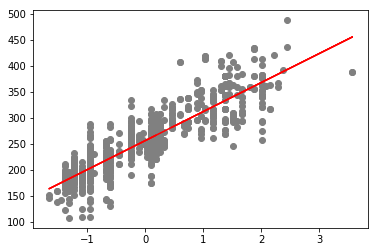

In [20]:
plt.scatter(x_train,y_train,c='grey')
y_pred = ( w * x_train + b )
plt.plot(x_train,y_pred, c =  'red')
plt.show()

# 3.3 (c) normal equation method.

In [21]:
# W = (X^TX)^-1 . X^TY
Y = y_train.reshape(853,1)
X = x_train.reshape(853,1)
onesArray = np.ones(X.shape)
Y.shape,X.shape

((853, 1), (853, 1))

In [22]:
X = np.hstack((onesArray,X))
inverse = np.linalg.inv(X.T.dot(X))

dablu = inverse.dot(X.T.dot(Y))
dablu
# inverse

array([[256.47457145],
       [ 55.83878736]])

# gradient descent method

In [23]:
def computeCost(X, Y, w, b):
    #### Compute cost J
    J = (((w*np.mean(X)) - np.mean(Y))**2)/(2*X.shape[0])
    return J

def gradientDescent (X, Y, learningRate, numIterations):
    w, b = 0, 0
    errorList =[] ### Store cost in each iteration
    for i in range(numIterations):
        print(f'iteration {i} value pf w = {w} and b = {b}')
#         Y_pred = #COMPUTE f(X)
        ### compute updated w and b
        costJ = computeCost(X, Y, w, b)
        errorList.append(costJ)
        wc = w - learningRate*(w*(np.mean((X)**2)) + b*np.mean(X) - np.mean(X*Y))
        bc = b - learningRate * (w* np.mean(X) + b - np.mean(Y))
        w = wc
        b = bc
    return (w,b,errorList)

In [24]:
w,b,errorList = gradientDescent (x_train, y_train, 0.001, numIterations=5000)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error

iteration 0 value pf w = 0 and b = 0
iteration 1 value pf w = 0.04702577186524608 and b = 0.2547596717467761
iteration 2 value pf w = 0.09401313053632068 and b = 0.5092660280595084
iteration 3 value pf w = 0.14096210600260484 and b = 0.7635193210738994
iteration 4 value pf w = 0.1878727282317365 and b = 1.017519802674437
iteration 5 value pf w = 0.23474502716962428 and b = 1.271267724494645
iteration 6 value pf w = 0.28157903274046103 and b = 1.5247633379173333
iteration 7 value pf w = 0.3283747748467375 and b = 1.778006894074848
iteration 8 value pf w = 0.3751322833692561 and b = 2.0309986438493213
iteration 9 value pf w = 0.42185158816714435 and b = 2.283738837872921
iteration 10 value pf w = 0.46853271907786875 and b = 2.5362277265280992
iteration 11 value pf w = 0.5151757059172483 and b = 2.7884655599478427
iteration 12 value pf w = 0.5617805784794677 and b = 3.0404525880159206
iteration 13 value pf w = 0.608347366537092 and b = 3.292189060367133
iteration 14 value pf w = 0.6548760

iteration 1702 value pf w = 42.87713394131635 and b = 209.14962618624614
iteration 1703 value pf w = 42.8884248370358 and b = 209.19655305811224
iteration 1704 value pf w = 42.899706072377654 and b = 209.2434333498682
iteration 1705 value pf w = 42.910977655409766 and b = 209.29026710779743
iteration 1706 value pf w = 42.92223959419348 and b = 209.33705437813734
iteration 1707 value pf w = 42.933491896783615 and b = 209.3837952070793
iteration 1708 value pf w = 42.94473457122851 and b = 209.43048964076877
iteration 1709 value pf w = 42.95596762556999 and b = 209.4771377253053
iteration 1710 value pf w = 42.96719106784341 and b = 209.52373950674263
iteration 1711 value pf w = 42.978404906077614 and b = 209.57029503108862
iteration 1712 value pf w = 42.98960914829499 and b = 209.61680434430542
iteration 1713 value pf w = 43.00080380251143 and b = 209.66326749230944
iteration 1714 value pf w = 43.01198887673635 and b = 209.70968452097145
iteration 1715 value pf w = 43.02316437897273 and b

iteration 2910 value pf w = 51.35599444774425 and b = 242.1876508147891
iteration 2911 value pf w = 51.359963301837674 and b = 242.20180006158068
iteration 2912 value pf w = 51.36392868817027 and b = 242.21593528101542
iteration 2913 value pf w = 51.36789060972085 and b = 242.23005648701417
iteration 2914 value pf w = 51.37184906946573 and b = 242.24416369348396
iteration 2915 value pf w = 51.37580407037873 and b = 242.258256914318
iteration 2916 value pf w = 51.379755615431144 and b = 242.2723361633957
iteration 2917 value pf w = 51.383703707591806 and b = 242.28640145458266
iteration 2918 value pf w = 51.387648349827046 and b = 242.30045280173076
iteration 2919 value pf w = 51.39158954510069 and b = 242.31449021867806
iteration 2920 value pf w = 51.39552729637409 and b = 242.32851371924892
iteration 2921 value pf w = 51.3994616066061 and b = 242.34252331725392
iteration 2922 value pf w = 51.403392478753105 and b = 242.35651902648996
iteration 2923 value pf w = 51.40731991576899 and b

iteration 4329 value pf w = 54.57520189940806 and b = 252.96904522657834
iteration 4330 value pf w = 54.57633663756202 and b = 252.9725119460387
iteration 4331 value pf w = 54.5774703664729 and b = 252.97597523362924
iteration 4332 value pf w = 54.578603087027616 and b = 252.97943509275086
iteration 4333 value pf w = 54.57973480011232 and b = 252.98289152680104
iteration 4334 value pf w = 54.580865506612405 and b = 252.9863445391739
iteration 4335 value pf w = 54.58199520741249 and b = 252.98979413326023
iteration 4336 value pf w = 54.583123903396434 and b = 252.99324031244743
iteration 4337 value pf w = 54.58425159544732 and b = 252.9966830801195
iteration 4338 value pf w = 54.58537828444748 and b = 253.00012243965716
iteration 4339 value pf w = 54.58650397127848 and b = 253.00355839443773
iteration 4340 value pf w = 54.58762865682112 and b = 253.0069909478352
iteration 4341 value pf w = 54.58875234195543 and b = 253.01042010322016
iteration 4342 value pf w = 54.58987502756069 and b =

# multiple regression

In [25]:
tempX = df.loc[:,['ENGINESIZE','FUELCONSUMPTION_COMB']]
tempX.shape[0]
tempY = df[['CO2EMISSIONS']]
multxScaled = (tempX - tempX.mean())/ tempX.std()
multxScaled

,ENGINESIZE,FUELCONSUMPTION_COMB
0,-0.950846,-0.883890
1,-0.668339,-0.568305
2,-1.303979,-1.629817
3,0.108555,-0.137962
4,0.108555,-0.281410
5,0.108555,-0.453547
6,0.108555,-0.424857
7,0.249808,-0.137962
8,0.249808,0.005485
9,-0.668339,-0.683063


In [26]:
xMult_train,xMult_test,yMult_train,yMult_test =  train_test_split(multxScaled,tempY,test_size = 0.2,random_state = 101)
xMult_train

,ENGINESIZE,FUELCONSUMPTION_COMB
1050,0.179181,0.148933
524,-1.233353,-0.797821
284,0.179181,-0.195341
957,0.179181,0.005485
639,-0.950846,-0.510926
281,0.179181,-0.310099
90,-0.244579,-0.424857
106,0.744195,0.321070
319,-0.668339,-0.683063
1019,-0.597712,-0.568305


In [27]:
multiX = np.hstack((np.ones((xMult_train.shape[0],1)),xMult_train))
multiX

array([[ 1.        ,  0.17918134,  0.14893269],
       [ 1.        , -1.23335273, -0.79782106],
       [ 1.        ,  0.17918134, -0.1953414 ],
       ...,
       [ 1.        ,  2.43923585,  2.12850872],
       [ 1.        ,  0.17918134,  0.52189629],
       [ 1.        ,  0.46168815,  0.75141235]])

In [28]:

T1 = np.linalg.inv(multiX.T.dot(multiX))

T2 = multiX.T.dot(yMult_train)
multW = T1.dot(T2)
multW

array([[256.33122529],
       [ 27.04244878],
       [ 34.75637446]])

In [29]:
X=df[['ENGINESIZE','FUELCONSUMPTION_COMB']]
N=float(len(Y))
Y = df['CO2EMISSIONS']
def gradientDescent (X, Y,learningRate, numIterations,w1=0,w2=0,b=0):
    errorList =pd.DataFrame(columns=['W1',"W2",'B','Cost']) ### Store cost in each iteration
    for i in range(numIterations):
        Y_pred = b + w1*X['ENGINESIZE']+w2*X['FUELCONSUMPTION_COMB']
        wi1=(-2/N)*sum(X['ENGINESIZE']*(Y-Y_pred))
        wi2=(-2/N)*sum(X['FUELCONSUMPTION_COMB']*(Y-Y_pred))
        bi=(-2/N)*sum((Y-Y_pred))
        costJ=sum([d**2 for d in (Y-Y_pred)])/N
        w1=w1-(learningRate*wi1)
        w2=w2-(learningRate*wi2)
        b=b-(learningRate*bi)
        errorList.loc[i]=[w1,w2,b,costJ]
    return errorList

In [ ]:
m = gradientDescent (X, Y, 0.001, numIterations=25000)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error
m.reset_index().plot.line(x='index',y=['Cost'])
print(m)